# Práctica #4 - Regresión polinomial y Regularización

Profesor: Luis Norberto Zúñiga Morales, Universidad Iberoamericana Ciudad de México

Instrucciones:

- Realizar cada una de las actividades propuestas en este libro de Google Colab.
- Se puede realizar en equipos de 2 personas.
- Para la entrega de sus respuestas, es importante que la celda en cuestión se encuentre ejecutada para mostrar su resultados.
- Descargar su libro con terminación IPYNB y subirlo en la actividad correspondiente de Brigthspace.


## Código

In [64]:
# librerias para implementar los modelos de ML
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# librerias auxiliares
import numpy as np
import matplotlib.pyplot as plt

Recuerden que la regresión polinomial en una variable puede tener la forma:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 +...+\theta_nx^n  $$

El objetivo de esta práctica es utilizar regresión polinomial en scikit-learn para entrenar un modelo que permita predecir los valores de la siguiente función:

$$f(x) = 1 + x +2x^2 + 3x^3$$

Vamos a empezar generando los datos de la función:

-  El vector de características `X`, en este caso en una dimensión, serían los valores de $x$ que se alimentan a la función $f(x)$, que en este caso limitamos a las $x$ entre -10 y 10.
- Los valores de la función $f(x)$ que adoptan en cada valor de $x$ serán nuestro vector de valores `y` asociados a cada dato del conjunto de datos.

In [65]:
X = np.arange(-10,10.2,0.2)
y = 1+X+2*X**2+3*X**3 # x

Una gráfica para ver la función:

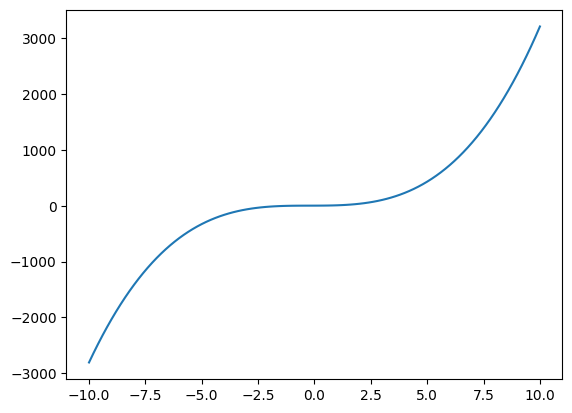

In [66]:
plt.plot(X,y)
plt.show()

Vamos a definir el modelo polinomial con la función `PolynomialFeatures`. De [su documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures) en scikit learn:


> Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].


Creamos la instancia del transformador, y después *ajustamos* con los datos de entrenamiento y *transformamos* TODOS los datos, es decir, los de prueba y entrenamiento. Noten que para que `PolynomialFeatures` funcione, este espear un arrego de dos dimensiones, por lo que debemos transformar los datos primero.

Iniciamos separando nuestros datos en dos conjuntos de prueba y entrenamiento especificando una semilla para generar las mismas particiones en cada experimento y así poder comparar los resultados obtenidos:

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

Antes de continuar, vamos a observar cual es la forma del conjunto `X_train`:

In [68]:
X_train.shape

(75,)

De lo anterior se puede observar que es un arreglo en una dimensión. Por lo que se mencionó anteriormente, esto nos generará problemas, por lo que vamos a transformarlo en una matriz de una sola columna:

In [ ]:
X_train.reshape(-1,1)

In [70]:
X_train.reshape(-1,1).shape

(75, 1)

Declaramos la instancia de nuestro generador de características:

In [71]:
poly = PolynomialFeatures(degree=3, include_bias=True)

  Ajustamos el generador de características con `X_train:

In [73]:
poly.fit(X_train.reshape(-1, 1))

PolynomialFeatures(degree=3)

Transformamos los datos en `X_train` con el generador ajustado:

In [ ]:
poly.transform(X_train.reshape(-1, 1))

Hacemos lo anterior para los conjuntos `X_train` y `X_test`:

In [76]:
poly_features_train = poly.transform(X_train.reshape(-1, 1))

In [77]:
poly_features_test = poly.transform(X_test.reshape(-1, 1))

Ahora, vamos a declarar nuestro modelo de regresión simple para después entrenarlo:

In [78]:
poly_reg_model = LinearRegression()

Entrenamos el modelo con nuestros datos transformados `poly_features_train`:

In [79]:
poly_reg_model.fit(poly_features_train, y_train)

LinearRegression()

Una vez entrenado el modelo, procedemos a calcular las predicciones `y_pred` utilizando los datos del conjunto de prueba transformado `poly_features_test`:

In [80]:
y_pred = poly_reg_model.predict(poly_features_test)
y_pred

array([ 1.043576e+03,  7.000000e+00,  1.229840e+02,  1.454320e+02,
       -1.000000e+00, -2.346400e+01, -4.687280e+02, -2.504000e+00,
       -1.415000e+03, -2.809000e+03, -7.099120e+02, -1.630000e+02,
        2.678872e+03, -9.719200e+01,  5.371120e+02, -2.174984e+03,
        2.065688e+03,  5.961680e+02, -1.208008e+03, -1.385360e+02,
        4.821040e+02,  1.554136e+03, -2.894960e+02, -7.768000e+00,
        2.290000e+02, -9.370000e+02])

Evaluamos el modelo entrenado con el error cuadrático medio:

In [57]:
error = mean_squared_error(y_test, y_pred)
error

1.355805604598068e-25

Vamos a graficar las predicciones que realizó el modelo contra la gráfica original:

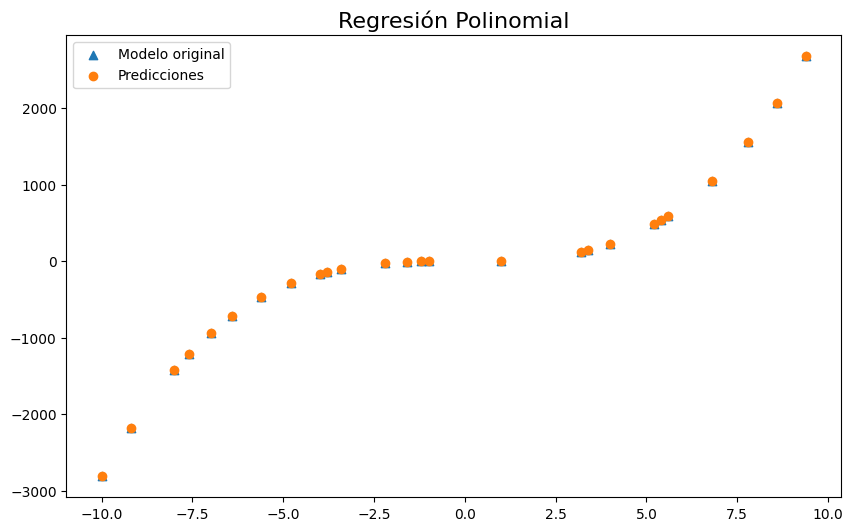

In [82]:
plt.figure(figsize=(10, 6))
plt.title("Regresión Polinomial", size=16)
plt.scatter(X_test, y_test, marker='^', label='Modelo original')
plt.scatter(X_test, y_pred, marker='o', label='Predicciones')
plt.legend()
plt.show()

## Actividades

**Actividad #1** *(4 puntos)*: Dibujar la gráfica del Error Cuadrático Medio generado al iterar el grado $d$ del polinomio entre 1 y 10. Obtener los valores de $\theta$ que determina el modelo de regresión polinomial para cada valor de $d$.

*Pista*: Junten todo en un ciclo for que vaya desde 1 hasta 10 y el valor del ECM guárdenlo en una lista, que será la que utilizarán para graficar el ECM vs $d$.

**Actividad #2** *(4 puntos)*: En lugar de usar regresión lineal, utilizen regresión [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) en scikit learn, y obtengan lo que se pide en la actividad 1.

**Actividad #3** *(2 puntos)*: De las gráficas anteriores, ¿cual sería el valor óptimo (a ojo de buen cubero) para $d$? ¿Notan alguna diferencia entre ambos modelos de regresión?